# EVN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 

# 단어 긍정(2), 중립(1), 부정(0) 분류 프로젝트

## 데이터

In [3]:
# 입력 문장
sentences = [
    '나는 오늘 기분이 좋아',
    '나는 오늘 우울해'
]

# 출력 정답
labels = [[1, 1, 1, 2],
          [1, 1, 0]]  # 긍정(2), 중립(1), 부정(0)

# 정답 dic
id_to_label = {0: '부정', 1: '중립', 2: '긍정'}


## Vocabulary

In [4]:
words = []
for sentence in sentences:
  #print(sentence.split())  ->단어 중복됨
  words.extend(sentence.split())
words

#중복 단어 제거
words = list(dict.fromkeys(words))
words

['나는', '오늘', '기분이', '좋아', '우울해']

In [5]:
#각 단어별 고유한 번호 부여
word_to_id = {'[PAD]' : 0 , '[UNK]' : 1}
for word in words:
  word_to_id[word] = len(word_to_id)
word_to_id

{'[PAD]': 0, '[UNK]': 1, '나는': 2, '오늘': 3, '기분이': 4, '좋아': 5, '우울해': 6}

In [6]:
#각 숫자별 단어 부여
id_to_word = {_id:word for word, _id in word_to_id.items()}
id_to_word

{0: '[PAD]', 1: '[UNK]', 2: '나는', 3: '오늘', 4: '기분이', 5: '좋아', 6: '우울해'}

## 모델 학습용 데이터 생성

In [7]:
#학습용 입력 데이터 생성
train_inputs = []
for sentence in sentences:
  train_inputs.append([word_to_id[word] for word in sentence.split()])
train_inputs

[[2, 3, 4, 5], [2, 3, 6]]

In [8]:
#문장의 길이를 모두 동일하게 변경 (최대 길이 4)
for row in train_inputs:
  row += [0]*(4-len(row))
train_inputs

[[2, 3, 4, 5], [2, 3, 6, 0]]

In [9]:
#train inputs을 numpy array로 변환
train_inputs = np.array(train_inputs)
train_inputs.shape
train_inputs

array([[2, 3, 4, 5],
       [2, 3, 6, 0]])

In [10]:
#train_labels 는 labels 그대로 사용
train_labels = labels
train_labels

[[1, 1, 1, 2], [1, 1, 0]]

In [11]:
#정답의 길이를 모두 동일하게 변경 (최대 길이 4)
for row in train_labels:
  row += [0]*(4-len(row))
train_labels

[[1, 1, 1, 2], [1, 1, 0, 0]]

In [12]:
#train_labels 를 numpy array 로 변환
train_labels = np.array(train_labels)
train_labels

array([[1, 1, 1, 2],
       [1, 1, 0, 0]])

## 모델링

In [13]:
#입력 단어를 vector 로 변환
embedding = tf.keras.layers.Embedding(len(word_to_id),8) #n_vocab, d_model
hidden = embedding(train_inputs)
hidden.shape  #[2,4] -> [2,4,8] 2개의 문장 4개의 단어 8개의 벡터
hidden


<tf.Tensor: shape=(2, 4, 8), dtype=float32, numpy=
array([[[ 0.04284133, -0.02876711, -0.00163866,  0.03330027,
          0.02337365, -0.0269662 ,  0.03933139, -0.04309992],
        [ 0.00149342, -0.00417253, -0.01605514, -0.02321813,
         -0.03963493,  0.03614226, -0.01307565, -0.00721397],
        [ 0.01542466, -0.02542632,  0.01366394, -0.0437231 ,
         -0.02262963, -0.02166047, -0.03564167,  0.03728526],
        [-0.02978122, -0.04857594,  0.03387824, -0.04405332,
          0.04253738, -0.01814602,  0.01797739, -0.00856046]],

       [[ 0.04284133, -0.02876711, -0.00163866,  0.03330027,
          0.02337365, -0.0269662 ,  0.03933139, -0.04309992],
        [ 0.00149342, -0.00417253, -0.01605514, -0.02321813,
         -0.03963493,  0.03614226, -0.01307565, -0.00721397],
        [-0.02662399,  0.04946632,  0.03242302, -0.04461578,
          0.02674143, -0.04453809,  0.00550575, -0.04626625],
        [ 0.03240485, -0.01853127, -0.01492356,  0.02773939,
          0.00410317,  0.

In [14]:
#단어의 vector를 이용해서 긍정,부정,중립 확률값 예측
linear = tf.keras.layers.Dense(3, activation=tf.nn.softmax)
outputs = linear(hidden)
outputs

<tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
array([[[0.35309497, 0.33300892, 0.3138961 ],
        [0.31872532, 0.34578976, 0.33548495],
        [0.3296053 , 0.33526137, 0.3351333 ],
        [0.34787038, 0.32946715, 0.32266244]],

       [[0.35309497, 0.33300892, 0.3138961 ],
        [0.31872532, 0.34578976, 0.33548495],
        [0.34833375, 0.31502986, 0.33663645],
        [0.33087674, 0.34070322, 0.32842004]]], dtype=float32)>

In [15]:
#단어의 vector를 이용해서 긍정,부정,중립 확률값 예측
linear_2 = tf.keras.layers.Dense(3)
logits = linear_2(hidden)
logits

<tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
array([[[ 0.01610089,  0.00811118, -0.00184337],
        [ 0.0066236 ,  0.02214439, -0.05437662],
        [ 0.01430304,  0.05302685,  0.02138903],
        [ 0.01652439,  0.01000705,  0.08214334]],

       [[ 0.01610089,  0.00811118, -0.00184337],
        [ 0.0066236 ,  0.02214439, -0.05437662],
        [ 0.03089322,  0.00058984,  0.02794337],
        [-0.00242847, -0.01318137, -0.03467439]]], dtype=float32)>

In [16]:
#softmax 계산을 위한 준비 exp(x')/ sum(exp(x))
numerator = np.exp(logits)
denominator = np.sum(numerator, axis=2, keepdims = True)
numerator, denominator

(array([[[1.0162312 , 1.0081441 , 0.99815834],
         [1.0066456 , 1.0223914 , 0.94707537],
         [1.0144058 , 1.0544579 , 1.0216194 ],
         [1.0166616 , 1.0100573 , 1.0856115 ]],
 
        [[1.0162312 , 1.0081441 , 0.99815834],
         [1.0066456 , 1.0223914 , 0.94707537],
         [1.0313754 , 1.00059   , 1.0283375 ],
         [0.99757445, 0.9869051 , 0.96591985]]], dtype=float32),
 array([[[3.022534 ],
         [2.9761124],
         [3.0904832],
         [3.1123304]],
 
        [[3.022534 ],
         [2.9761124],
         [3.0603027],
         [2.9503994]]], dtype=float32))

In [17]:
#두 결과값 비교
probs = numerator / denominator
probs

array([[[0.3362183 , 0.3335427 , 0.3302389 ],
        [0.3382418 , 0.34353253, 0.31822568],
        [0.32823536, 0.34119517, 0.33056948],
        [0.32665607, 0.3245341 , 0.34880984]],

       [[0.3362183 , 0.3335427 , 0.3302389 ],
        [0.3382418 , 0.34353253, 0.31822568],
        [0.33701745, 0.32695785, 0.33602476],
        [0.33811507, 0.33449882, 0.32738614]]], dtype=float32)

In [18]:
#dense 의 weight, bias
weight, bias = linear_2.get_weights()
weight, bias

(array([[ 0.51068157,  0.38602406, -0.5540943 ],
        [ 0.11337417, -0.23633122, -0.34862953],
        [ 0.06252736, -0.1160447 ,  0.5583921 ],
        [-0.5637511 , -0.6283983 , -0.00735343],
        [ 0.15528232, -0.6299964 ,  0.42939287],
        [ 0.03157341, -0.42239594, -0.5765226 ],
        [ 0.15316945,  0.35890192,  0.318016  ],
        [-0.17533964,  0.12229019,  0.5815678 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32))

In [19]:
#numpy를 이용한 Wx + b
logits = np.matmul(hidden, weight) + bias
logits

array([[[ 0.01610089,  0.00811118, -0.00184337],
        [ 0.0066236 ,  0.02214439, -0.05437662],
        [ 0.01430304,  0.05302685,  0.02138903],
        [ 0.01652439,  0.01000705,  0.08214334]],

       [[ 0.01610089,  0.00811118, -0.00184337],
        [ 0.0066236 ,  0.02214439, -0.05437662],
        [ 0.03089322,  0.00058984,  0.02794337],
        [-0.00242847, -0.01318137, -0.03467439]]], dtype=float32)

In [ ]:
def build_model(n_vocab, d_model, n_seq, n_out):
  """
  동작만 하는 간단한 모델
  :n_vocab : vocabulary 단어 수
  :d_model : 단어를 의미하는 벡터의 차원 수
  :n_seq : 문장길이(단어 수)
  :n_out : 예측할 class 개수
  """
  inputs = tf.keras.layers.Input((n_seq,))

  #입력 단어를 vector로 변환
  embedding = tf.keras.layers.Embedding(n_vocab, d_model)
  hidden = embedding(inputs)
  #단어의 vector를 이용해서 정답 확률값 예측
  linear = tf.keras.layers.Dense(n_out, activation=tf.nn.softmax)
  outputs = linear(hidden)
  #학습할 모델 선언
  model = tf.keras.Model(inputs = inputs, outputs = outputs)
  return model

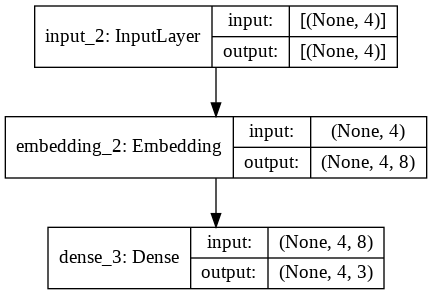

In [41]:
#모델 생성
model = build_model(len(word_to_id),8,4,3)
#모델 내용 그래프 출력
tf.keras.utils.plot_model(model, 'model.png',show_shapes = True)

In [ ]:
#jupyter 환경 아닐 때
model.summary()

## 학습

In [30]:
#모델 loss,optimizer,metric 정의
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [31]:
#모델 학습
history = model.fit(train_inputs, train_labels, epochs=100, batch_size = 16)

Epoch 1/100
1/1 [==============================] - 1s 584ms/step - loss: 1.1041 - accuracy: 0.3750
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 1.1017 - accuracy: 0.3750
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0993 - accuracy: 0.3750
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 1.0968 - accuracy: 0.3750
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 1.0944 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0920 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 1.0896 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 1.0872 - accuracy: 0.7500
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0848 - accuracy: 0.7500
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0824 - accuracy: 0.7500
Epoch 11/100
1/1 [=========

## 평가

In [33]:
#모델 평가
model.evaluate(train_inputs, train_labels)

1/1 [==============================] - 0s 14ms/step - loss: 0.8109 - accuracy: 1.0000


[0.8108717203140259, 1.0]

## 예측

In [34]:
#추론할 입력
string = '나는 기분이 우울해'

In [35]:
#입력을 숫자로 변경
infer_input = [word_to_id[word] for word in string.split()]
infer_input

[2, 4, 6]

In [36]:
#문장의 길이를 모두 동일하게 변경 (최대 4)
infer_input += [0]*(4-len(infer_input))
infer_input

[2, 4, 6, 0]

In [37]:
#numpy array 로 변환
infer_input = np.array([infer_input])
infer_input

array([[2, 4, 6, 0]])

In [38]:
#긍정/부정 추론
y_preds = model.predict(infer_input)
y_preds

array([[[0.2670668 , 0.49976307, 0.23317015],
        [0.26543173, 0.49701488, 0.23755345],
        [0.38678983, 0.31532747, 0.29788277],
        [0.36712304, 0.33031213, 0.30256486]]], dtype=float32)

In [39]:
#확률의 max 값을 추론 값으로 변경
y_pred_class = np.argmax(y_preds, axis=2)
y_pred_class

array([[1, 1, 0, 0]])